In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
import networkx as nx
import numpy as np
#import import_ipynb

In [ ]:
!pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.2/110.2 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.0 MB/s eta 0:00:00
  Created wheel for python-igraph: filename=python_igraph-0.10.3-py3-none-any.whl size=9074 sha256=f15708d070078494bbd7d82635180c7aca21a90eb7a7e4160895a1a5b225ffbb
  Stored in directory: /root/.cache/pip/wheels/89/e5/ce/6b6a72dd08502dee685b95fb8733a983bc86575c013371f15a
Successfully built python-igraph


In [ ]:
import fcts


In [ ]:
g = nx.read_edgelist('fbData.txt',create_using=nx.Graph(),nodetype=int)


In [ ]:
#centrality measuers computing 
dc = nx.degree_centrality(g)    
bc = nx.betweenness_centrality(g)
cc = nx.closeness_centrality(g)
ec = nx.eigenvector_centrality(g)

In [ ]:
evolution_matrix = fcts.creat_evaluation_matrix(g,dc,bc,cc,ec)#evolution matrix is evaluation matrix only as a dataFrame 
ev_matrix_np = fcts.evolution_matrix_tonp(evolution_matrix)#numpy array version of evaluation matrix
weights = fcts.entropy(g=g,ev_mat=ev_matrix_np)
t = fcts.Topsis(ev_matrix_np,weights,criteria = np.array([True,True,True,True]))
t.calc()
top_k_noeuds, tous_les_noeuds = fcts.top_meth(evolution_matrix,t=t)


Step 1
 [[8.59336305e-02 1.46305921e-01 3.53342667e-01 3.39179617e-05]
 [4.21000495e-03 2.78327442e-06 2.61376141e-01 6.04534613e-07]
 [2.47647350e-03 7.59502118e-08 2.61257764e-01 2.23346094e-07]
 ...
 [4.95294700e-04 0.00000000e+00 1.83988700e-01 2.93122343e-10]
 [9.90589401e-04 7.15684688e-08 1.84005468e-01 2.98923251e-10]
 [2.22882615e-03 6.33892152e-07 1.84047402e-01 8.91517473e-10]]

Step 2
 [[8.00164615e-02 1.97368601e-01 1.99619580e-02 3.39179617e-05]
 [3.92011483e-03 3.75467359e-06 1.47663445e-02 6.04534613e-07]
 [2.30594990e-03 1.02457829e-07 1.47596568e-02 2.23346094e-07]
 ...
 [4.61189980e-04 0.00000000e+00 1.03943708e-02 2.93122343e-10]
 [9.22379960e-04 9.65468003e-08 1.03953181e-02 2.98923251e-10]
 [2.07535491e-03 8.55128803e-07 1.03976871e-02 8.91517473e-10]]

Step 3
 [[5.05637918e-03 1.20731938e-01 2.19598490e-05 1.09894281e-05]
 [2.47718865e-04 2.29676360e-06 1.62442330e-05 1.95869366e-07]
 [1.45716979e-04 6.26742662e-08 1.62368760e-05 7.23641902e-08]
 ...
 [2.91433958

In [ ]:
top_k_noeuds

,dcn,ccn,bcn,ecn,S+,S-,C,node2
0,107,107,107,1912,0.277705,0.120837,0.303198,107
1,1684,58,1684,2266,0.398007,0.000233,0.000586,1684
2,1912,428,3437,2206,0.398013,0.000131,0.000330,3437
3,3437,563,1912,2233,0.398008,0.000233,0.000586,1912
4,0,1684,1085,2464,0.398013,0.000131,0.000330,1085
5,2543,171,0,2142,0.398010,0.000175,0.000439,0
6,2347,348,698,2218,0.398016,0.000073,0.000183,698
7,1888,483,567,2078,0.397867,0.000311,0.000780,567
8,1800,414,58,2123,0.398014,0.000102,0.000257,58
9,1663,376,428,1993,0.397974,0.000816,0.002047,428


In [ ]:
tous_les_noeuds

,dcn,ccn,bcn,ecn,S+,S-,C,node2
0,107,107,107,1912,0.277705,1.208372e-01,3.031983e-01,107
1,1684,58,1684,2266,0.398007,2.332158e-04,5.856155e-04,1684
2,1912,428,3437,2206,0.398013,1.312467e-04,3.296459e-04,3437
3,3437,563,1912,2233,0.398008,2.332086e-04,5.855962e-04,1912
4,0,1684,1085,2464,0.398013,1.312468e-04,3.296462e-04,1085
...,...,...,...,...,...,...,...,...
4034,358,699,3965,841,0.398018,1.457606e-05,3.662027e-05,4010
4035,3230,841,3910,775,0.398018,3.558509e-07,8.940556e-07,4008
4036,2842,744,3653,749,0.398018,1.457606e-05,3.662027e-05,3984
4037,3183,692,3897,692,0.398017,4.371659e-05,1.098240e-04,801


In [ ]:
import pandas as pd
kinit = pd.read_csv('kinit.csv')
kinit=kinit.drop(columns = ['Unnamed: 0'], axis=1)

kinit

,node,dc,bc,cc,ec,C
0,107,0.258791,0.480518,0.459699,2.606940e-04,9.279133e-01
1,1684,0.196137,0.337797,0.393606,7.164260e-06,6.960689e-01
2,3437,0.135463,0.236115,0.314413,9.531613e-08,4.885255e-01
3,1912,0.186974,0.229295,0.350947,9.540696e-02,4.808275e-01
4,1085,0.016345,0.149015,0.357852,3.164082e-06,3.084781e-01
...,...,...,...,...,...,...
4034,4035,0.000248,0.000000,0.183980,2.912901e-10,8.940556e-07
4035,4010,0.000248,0.000000,0.183980,2.912901e-10,8.940556e-07
4036,4015,0.000248,0.000000,0.183980,2.912901e-10,8.940556e-07
4037,692,0.000248,0.000000,0.178255,6.385265e-14,0.000000e+00


In [ ]:
#application kmeans
k=len(top_k_noeuds)
init=kinit[0:k]

kmeans = KMeans(n_clusters=k, max_iter=20000, n_init=10,random_state=0)


In [ ]:
clusters_list = kmeans.fit_predict(evolution_matrix[['dc','bc','cc','ec']])


In [ ]:
centers=kmeans.cluster_centers_
centers

array([[4.41450817e-03, 1.69327300e-04, 2.36614830e-01, 1.24991277e-09],
       [3.00630849e-02, 3.85072268e-04, 3.22453446e-01, 7.40995733e-05],
       [6.01181912e-03, 1.04689332e-04, 2.82759449e-01, 9.75131668e-05],
       [4.03073784e-02, 9.32255977e-05, 2.63114791e-01, 6.84778584e-02],
       [3.62042827e-03, 1.74262941e-06, 1.79971031e-01, 1.00765151e-10],
       [5.11108671e-03, 7.98038402e-06, 2.62905282e-01, 1.00619946e-03],
       [1.94341258e-01, 3.20931556e-01, 3.79666230e-01, 2.39187288e-02],
       [7.68194160e-03, 1.78594720e-04, 3.18404352e-01, 7.28302465e-06],
       [3.32072583e-02, 8.01063944e-02, 3.59155714e-01, 1.23187632e-03],
       [2.28793510e-02, 2.25720432e-04, 2.84160315e-01, 2.18877191e-03]])

In [ ]:
kinit

,node,dc,bc,cc,ec,C
0,107,0.258791,0.480518,0.459699,2.606940e-04,9.279133e-01
1,1684,0.196137,0.337797,0.393606,7.164260e-06,6.960689e-01
2,3437,0.135463,0.236115,0.314413,9.531613e-08,4.885255e-01
3,1912,0.186974,0.229295,0.350947,9.540696e-02,4.808275e-01
4,1085,0.016345,0.149015,0.357852,3.164082e-06,3.084781e-01
...,...,...,...,...,...,...
4034,4035,0.000248,0.000000,0.183980,2.912901e-10,8.940556e-07
4035,4010,0.000248,0.000000,0.183980,2.912901e-10,8.940556e-07
4036,4015,0.000248,0.000000,0.183980,2.912901e-10,8.940556e-07
4037,692,0.000248,0.000000,0.178255,6.385265e-14,0.000000e+00


In [ ]:
list_cluster = []

for idx, value in enumerate(clusters_list):
  list_cluster.append(value)

print(list_cluster)

[8, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 8, 5, 5, 5, 5, 5, 2, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 2, 5, 9, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 7, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 9, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 

In [ ]:
evolution_matrix['cluster'] = list_cluster

In [ ]:
evolution_matrix

,node,dc,bc,cc,ec,cluster
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05,8
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07,5
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07,5
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07,5
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07,5
...,...,...,...,...,...,...
4034,4034,0.000495,0.000000e+00,0.183989,2.951270e-10,4
4035,4035,0.000248,0.000000e+00,0.183980,2.912901e-10,4
4036,4036,0.000495,0.000000e+00,0.183989,2.931223e-10,4
4037,4037,0.000991,7.156847e-08,0.184005,2.989233e-10,4


In [ ]:
import math
def distance_euclidean(data,center,j):
    T= pd.DataFrame()
    for i in range(len(data)):
        distance=math.sqrt((data['dc'][i]-center[j][0])**2+(data['bc'][i]-center[j][1])**2+
                           (data['cc'][i]-center[j][2])**2+(data['ec'][i]-center[j][3])**2)
        T=T.append({'node':data['node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
    return T.sort_values(by='distance from center')

In [ ]:
import math
def distance_euclidean2(data,center,j):
    T= pd.DataFrame()
    for i in range(len(data)):
        distance=math.sqrt((data['dc'][i]-center[j][0])**2+(data['bc'][i]-center[j][1])**2+
                           (data['cc'][i]-center[j][2])**2+(data['ec'][i]-center[j][3])**2)
        T=T.append({'node':data['node'][i], 'cluster':str(j),'distance from center':distance},ignore_index=True)
    return T
    # return T.sort_values(by='distance from center')

In [ ]:
data=kinit[["dc","bc","cc","ec","node"]]
top10=kinit.head(10)

In [ ]:



Res= pd.DataFrame()
for i in range(len(top_k_noeuds)):
  T=distance_euclidean(data,centers,i)
  Res=Res.append({'cluster':str(i), 'Node_avant_KMeans':str(top10['node'][i]),
                    'Node_ apres _KMeans':int(T.head(1)['node']),
                    'distance from center':float(T.head(1)['distance from center'])},ignore_index=True)

# data = pd.read_csv("kinit.csv")


In [ ]:
Res

,cluster,Node_avant_KMeans,Node_ apres _KMeans,distance from center
0,0,107,3662.0,0.002842
1,1,1684,1277.0,0.002659
2,2,3437,2795.0,0.000216
3,3,1912,2112.0,0.000952
4,4,1085,765.0,0.001527
5,5,0,303.0,0.001776
6,6,698,1684.0,0.032462
7,7,567,1606.0,0.000416
8,8,58,414.0,0.034669
9,9,428,2927.0,0.002203


In [ ]:
top_k_noeuds

,dcn,ccn,bcn,ecn,S+,S-,C,node2
0,107,107,107,1912,0.277705,0.120837,0.303198,107
1,1684,58,1684,2266,0.398007,0.000233,0.000586,1684
2,1912,428,3437,2206,0.398013,0.000131,0.000330,3437
3,3437,563,1912,2233,0.398008,0.000233,0.000586,1912
4,0,1684,1085,2464,0.398013,0.000131,0.000330,1085
5,2543,171,0,2142,0.398010,0.000175,0.000439,0
6,2347,348,698,2218,0.398016,0.000073,0.000183,698
7,1888,483,567,2078,0.397867,0.000311,0.000780,567
8,1800,414,58,2123,0.398014,0.000102,0.000257,58
9,1663,376,428,1993,0.397974,0.000816,0.002047,428


In [ ]:
Rank_DC_ = si_model(g,set(tous_les_noeuds['dcn']))


In [ ]:
Rank_DC_

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [403,
  1022,
  2001,
  2710,
  3145,
  3393,
  3564,
  3670,
  3746,
  3801,
  3840,
  3876,
  3899,
  3911,
  3928,
  3938,
  3950,
  3957,
  3965,
  3971],
 [3636,
  3017,
  2038,
  1329,
  894,
  646,
  475,
  369,
  293,
  238,
  199,
  163,
  140,
  128,
  111,
  101,
  89,
  82,
  74,
  68]]

In [ ]:
Rank_DC = fcts.SI(g,set(top_k_noeuds['dcn']))
Rank_BC = fcts.SI(g,set(top_k_noeuds['bcn']))
Rank_CC = fcts.SI(g,set(top_k_noeuds['ccn']))
Rank_EC = fcts.SI(g,set(top_k_noeuds['ecn']))
Rank_Kmeans=fcts.SI(g,set(Res['Node_ apres _KMeans']))
Rank_Topsis = fcts.SI(g,set(top_k_noeuds['node2']))

In [ ]:
Rank_DC

,iteration,nb_Susceptible,Nb_infected
0,0,4029,10
1,1,576,3463
2,2,201,3838
3,3,55,3984
4,4,0,4039


In [ ]:
Rank_DC

,iteration,nb_Susceptible,Nb_infected
0,0,4029,10
1,1,576,3463
2,2,201,3838
3,3,55,3984
4,4,0,4039


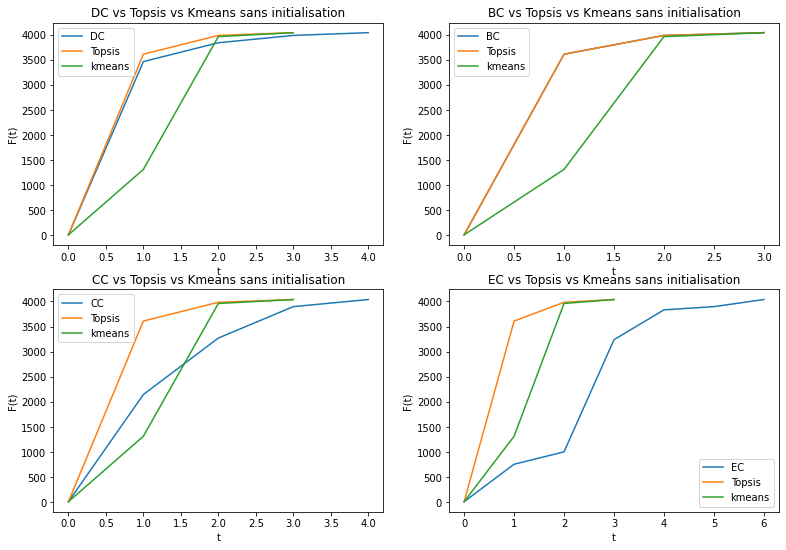

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(13, 9))
axs[0, 0].plot(Rank_DC['iteration'], Rank_DC['Nb_infected'], label="DC")
axs[0, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 0].plot(Rank_Kmeans['iteration'], Rank_Kmeans['Nb_infected'], label="kmeans")
axs[0, 0].set_title("DC vs Topsis vs Kmeans sans initialisation")
axs[0, 0].legend()

axs[0, 1].plot(Rank_BC['iteration'], Rank_BC['Nb_infected'], label="BC")
axs[0, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 1].plot(Rank_Kmeans['iteration'], Rank_Kmeans['Nb_infected'], label="kmeans")
axs[0, 1].set_title("BC vs Topsis vs Kmeans sans initialisation")
axs[0, 1].legend()

axs[1, 0].plot(Rank_CC['iteration'], Rank_CC['Nb_infected'], label="CC")
axs[1, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 0].plot(Rank_Kmeans['iteration'], Rank_Kmeans['Nb_infected'], label="kmeans")

axs[1, 0].set_title("CC vs Topsis vs Kmeans sans initialisation")
axs[1, 0].legend()

axs[1, 1].plot(Rank_EC['iteration'], Rank_EC['Nb_infected'], label="EC")
axs[1, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 1].plot(Rank_Kmeans['iteration'], Rank_Kmeans['Nb_infected'], label="kmeans")
axs[1, 1].set_title("EC vs Topsis vs Kmeans sans initialisation")
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')
plt.show()

KeyError: ignored

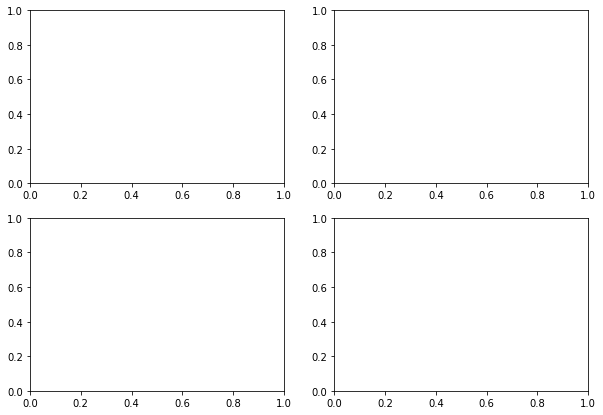

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].plot(Rank_DC[0], Rank_DC[1], label="DC")
axs[0, 0].plot(Rank_Topsis[0], Rank_Topsis[1], label="Topsis")
axs[0, 0].plot(Rank_Kmeans[0], Rank_Kmeans[1], label="kmeans")
axs[0, 0].set_title("DC vs W-Topsis vs K-Means")
axs[0, 0].legend()

axs[0, 1].plot(Rank_BC[0], Rank_BC[1], label="BC")
axs[0, 1].plot(Rank_Topsis[0], Rank_Topsis[1], label="Topsis")
axs[0, 1].plot(Rank_Kmeans[0], Rank_Kmeans[1], label="kmeans")
axs[0, 1].set_title("BC vs W-Topsis  vs K-Means")
axs[0, 1].legend()

axs[1, 0].plot(Rank_CC[0], Rank_CC[1], label="CC")
axs[1, 0].plot(Rank_Topsis[0], Rank_Topsis[1], label="Topsis")
axs[1, 0].plot(Rank_Kmeans[0], Rank_Kmeans[1], label="kmeans")
axs[1, 0].set_title("CC vs W-Topsis vs K-Means")
axs[1, 0].legend()

axs[1, 1].plot(Rank_EC[0], Rank_EC[1], label="EC")
axs[1, 1].plot(Rank_Topsis[0], Rank_Topsis[1], label="Topsis")
axs[1, 1].plot(Rank_Kmeans[0], Rank_Kmeans[1], label="kmeans")
axs[1, 1].set_title("EC vs W-Topsis vs K-Means")
axs[1, 1].legend()
  
for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')
plt.show()

**Step II **

okaay

In [ ]:
def kmeans(X, n_cluster):
  
    init = X[0:n_cluster]    
    # kmeans application
    km = KMeans(n_clusters = n_cluster, n_init=1, init = init, max_iter = 1000)
    cluster = km.fit_predict(X)
    
    res = data.copy()
    res['cluster'] = cluster
  
    

    return (res)

In [ ]:
mmeans = kmeans(data[["dc","bc","cc","ec","node"]],10)

In [ ]:
new_kmeans = pd.DataFrame(mmeans[["dc","bc","cc","ec","node","cluster"]])

In [ ]:
new_kmeans

,dc,bc,cc,ec,node,cluster
0,0.258791,0.480518,0.459699,2.606940e-04,107,5
1,0.196137,0.337797,0.393606,7.164260e-06,1684,7
2,0.135463,0.236115,0.314413,9.531613e-08,3437,3
3,0.186974,0.229295,0.350947,9.540696e-02,1912,7
4,0.016345,0.149015,0.357852,3.164082e-06,1085,0
...,...,...,...,...,...,...
4034,0.000248,0.000000,0.183980,2.912901e-10,4035,2
4035,0.000248,0.000000,0.183980,2.912901e-10,4010,2
4036,0.000248,0.000000,0.183980,2.912901e-10,4015,2
4037,0.000248,0.000000,0.178255,6.385265e-14,692,8


In [ ]:
for i in range(10):
    ssgraph=g.subgraph(new_kmeans[new_kmeans.cluster == i].node)
    C=list(ssgraph.edges(new_kmeans[new_kmeans.cluster == i].node))
    n=ssgraph.number_of_nodes()
    
    with open("clusters2/cluster"+str(i+1)+".txt", 'w') as fp:
        for j in range(n):
            
            fp.write("{}".format(C[j][0])+"\t"+"{}".format(C[j][1])+"\n")

In [ ]:
def top_meth(evolution_matrix,t:fcts.Topsis):

    best_dist = np.array(t.best_distance)
    worst_dist = np.array(t.worst_distance)
    closenness = []
    closenness = worst_dist / (worst_dist + best_dist)

    
    C_df=pd.DataFrame(closenness,columns=['C'])
    c=sorted(range(len(closenness)),key=closenness.__getitem__)
    c= c[::-1]
    nodes_list=[]
    for i in range(len(c)):
      nodes_list.append(c[i])

    

    closeness_topsis = pd.DataFrame(

    {

        'S+': best_dist,
        'S-': worst_dist,
        'C': closenness,
        'node2':nodes_list

    }

    )



    centralities_closeness = pd.concat([evolution_matrix, C_df], axis=1)
    centralities_closeness = centralities_closeness.sort_values(by="C",ascending=False)
    centralities_closeness = centralities_closeness.drop(centralities_closeness.columns[0], axis=1)
    centralities_closeness.reset_index(inplace=True)
    centralities_closeness=centralities_closeness.rename(columns={'index':'node'})
    centralities_closeness.to_csv('kinit.csv')
    result = pd.concat([closeness_topsis, centralities_closeness], axis=1)


    degree=pd.DataFrame(result[['node','dc']].sort_values(by='dc',ascending=False))
    degree.rename(columns={'node':'dcn'},inplace=True)

    
    closeness=pd.DataFrame(result[['node','cc']].sort_values(by='cc',ascending=False))
    closeness.rename(columns={'node':'ccn'},inplace=True)

  
    betweenness=result[['node','bc']].sort_values(by='bc',ascending=False)
    betweenness.rename(columns={'node':'bcn'},inplace=True)

    
    eigenvector=result[['node','ec']].sort_values(by='ec',ascending=False)
    eigenvector.rename(columns={'node':'ecn'},inplace=True)

  

    degree_list=degree['dcn'].values.tolist()
    closeness_list=closeness['ccn'].values.tolist()
    betweenness_list=betweenness['bcn'].values.tolist()
    eigenvector_list=eigenvector['ecn'].values.tolist()


    mes_nodes=pd.DataFrame({

        'dcn':degree_list,
        'ccn':closeness_list,
        'bcn':betweenness_list,
        'ecn':eigenvector_list

    

    })



    final_res = pd.concat([mes_nodes,closeness_topsis], axis=1)
    return (final_res.head(10), final_res, )


In [ ]:
from math import log
def entropy(g, ev_mat):
  m = nx.number_of_nodes(g)  
  sum = np.zeros(3)
  
  for i in range(m):
    for j in range(3):
      sum[j] += ev_mat[i][j]
  
  p = np.copy(ev_mat)
  
  for i in range(m):
    for j in range(3):
      p[i][j] = ev_mat[i][j]/sum[j]

  k = 1/log(m)
  E = []
  plnp = []
 
  
  for j in range(3):
    temp_sum = 0
    for i in range(m):
      try:
         pij = p[i][j]
         temp_sum += pij*log(pij)
      except:
        pij = 1
        temp_sum += pij*log(pij)
    E.append( -k*temp_sum)

  D = []
  for i in range(3):
     D.append(1-E[i])

  sm = np.sum(D)
  return [D[i]/sm for i in range(3)]

In [ ]:
import ndlib.models.ModelConfig as mc

# Model Configuration
config = mc.Configuration()
config.add_model_parameter("beta", 0.15)

In [ ]:
def read_ev(file):

  filename=file+'.txt'
  g = nx.read_edgelist('clusters2/'+filename,create_using=nx.Graph(),nodetype=int)
  print(nx.info(g))
  #centrality measuers computing 
  dc = nx.degree_centrality(g)    
  bc = nx.betweenness_centrality(g)
  cc = nx.closeness_centrality(g)
  ec = nx.eigenvector_centrality(g)



  evolution_matrix = fcts.creat_evaluation_matrix(g,dc,bc,cc,ec)#evolution matrix is evaluation matrix only as a dataFrame 
  ev_matrix_np = fcts.evolution_matrix_tonp(evolution_matrix)#numpy array version of evaluation matrix
  weights = fcts.entropy(g=g,ev_mat=ev_matrix_np)
  t = fcts.Topsis(ev_matrix_np,weights,criteria = np.array([True,True,True,True]))
  t.calc()
  top_k_noeuds, tous_les_noeuds = top_meth(evolution_matrix,t=t)

  return top_k_noeuds, g



In [ ]:
file_input=str(input(print("donner le numéro du cluster")))

donner le numéro du cluster
None3


In [ ]:
name='cluster'+file_input
graph_cluster=read_ev(name)[1]
top_k_noeuds_cluster=read_ev(name)[0]



In [ ]:
top_k_noeuds_cluster

,dcn,ccn,bcn,ecn,S+,S-,C,node2
0,67,67,67,100,0.480239,0.020667,0.041260,67
1,110,7,110,67,0.479798,0.016163,0.032589,110
2,100,27,100,7,0.484087,0.002915,0.005986,100
3,7,103,49,103,0.484087,0.002915,0.005986,49
4,27,49,27,27,0.483025,0.008550,0.017392,27
5,103,76,7,76,0.484117,0.002639,0.005421,7
6,49,100,76,49,0.479075,0.023368,0.046509,76
7,76,110,24,83,0.385747,0.116342,0.231715,103
8,83,42,103,24,0.480978,0.010526,0.021416,24
9,24,107,83,107,0.484126,0.002556,0.005251,83


In [ ]:
import ndlib.models.epidemics as ep


In [ ]:
def SI(g,node):

    n = nx.number_of_nodes(g)

    model = ep.SIModel(g)

    cfg = mc.Configuration()

    cfg.add_model_parameter('beta', 0.05)

    cfg.add_model_initial_configuration('Infected', node)

    model.set_initial_status(cfg)

    res = pd.DataFrame(columns=['iteration', 'nb_Susceptible', 'Nb_infected'])

    for i in range(n):

        iteration = model.iteration_bunch(20)

        res.loc[len(res.index)] = [iteration['iteration'], iteration['node_count'][0], iteration['node_count'][1] ]

        if iteration['node_count'][1] == n:

            break 

    return res

In [ ]:
def si_model(CG,top):
    n=CG.number_of_nodes()
    model = ep.SIModel(CG)


    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.05)
    cfg.add_model_parameter("fraction_infected", 0.1)
    model.set_initial_status(cfg)



    iterations = model.iteration_bunch(20)
    S=[]
    I=[]
    it=[]
    for t in iterations:
        S.append(t['node_count'][0])
        I.append(t['node_count'][1])
        it.append(t['iteration'])
        if t['node_count'][1]==n:
            break
    row=[it,I,S]
    return(row)

In [ ]:
Rank_DC2 = si_model(graph_cluster,set(top_k_noeuds_cluster['dcn']))
Rank_BC2 = si_model(graph_cluster,set(top_k_noeuds_cluster['bcn']))
Rank_CC2 = si_model(graph_cluster,set(top_k_noeuds_cluster['ccn']))
Rank_EC2 = si_model(graph_cluster,set(top_k_noeuds_cluster['ecn']))
Rank_Topsis2 = si_model(graph_cluster,set(top_k_noeuds_cluster['C']))


In [ ]:
Rank_DC2

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [16,
  22,
  29,
  40,
  53,
  65,
  78,
  88,
  93,
  99,
  104,
  112,
  114,
  117,
  120,
  125,
  127,
  132,
  133,
  135],
 [153,
  147,
  140,
  129,
  116,
  104,
  91,
  81,
  76,
  70,
  65,
  57,
  55,
  52,
  49,
  44,
  42,
  37,
  36,
  34]]

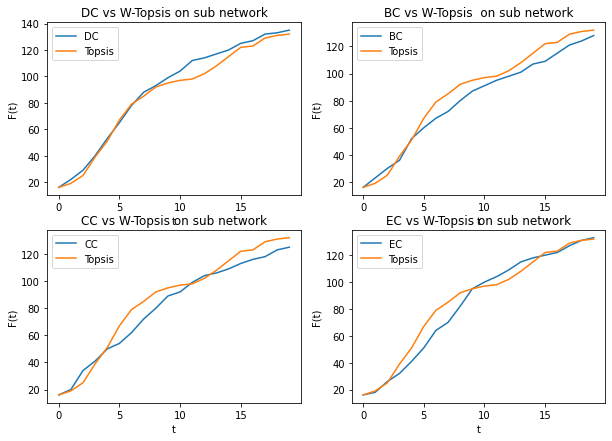

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].plot(Rank_DC2[0], Rank_DC2[1], label="DC")
axs[0, 0].plot(Rank_Topsis2[0], Rank_Topsis2[1], label="Topsis")
axs[0, 0].set_title("DC vs W-Topsis on sub network")
axs[0, 0].legend()

axs[0, 1].plot(Rank_BC2[0], Rank_BC2[1], label="BC")
axs[0, 1].plot(Rank_Topsis2[0], Rank_Topsis2[1], label="Topsis")
axs[0, 1].set_title("BC vs W-Topsis  on sub network")
axs[0, 1].legend()

axs[1, 0].plot(Rank_CC2[0], Rank_CC2[1], label="CC")
axs[1, 0].plot(Rank_Topsis2[0], Rank_Topsis2[1], label="Topsis")
axs[1, 0].set_title("CC vs W-Topsis on sub network")
axs[1, 0].legend()

axs[1, 1].plot(Rank_EC2[0], Rank_EC2[1], label="EC")
axs[1, 1].plot(Rank_Topsis2[0], Rank_Topsis2[1], label="Topsis")
axs[1, 1].set_title("EC vs W-Topsis on sub network")
axs[1, 1].legend()
  
for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')
plt.show()

In [ ]:
file_ev=pd.DataFrame()
test=pd.DataFrame()
graphs=[]
for i in range(len(top_k_noeuds)):
  if  i == 5:
    var=top_k_noeuds[top_k_noeuds['node2']==0]
  else:
    filename='cluster'+str(i+1)
    var=read_ev(filename)[0].head(1)
    graphs.append(read_ev(filename)[1])

  

  test=test.append({},ignore_index=True)
  file_ev=file_ev.append({'dcn':int(var[['dcn']].values),'ccn':int(var[['ccn']].values),
          'bcn':int(var[['bcn']].values),'ecn':int(var[['ecn']].values),'C':var[['C']].values[0][0],'node2':int(var[['node2']].values)},ignore_index=True)



In [ ]:
file_ev

,dcn,ccn,bcn,ecn,C,node2
0,37.0,37.0,37.0,131.0,0.007601,37.0
1,36.0,2.0,2.0,36.0,0.030888,2.0
2,67.0,67.0,67.0,100.0,0.041260,67.0
3,114.0,114.0,114.0,50.0,0.008176,114.0
4,26.0,26.0,26.0,26.0,0.007888,26.0
5,2543.0,171.0,0.0,2142.0,0.000439,0.0
6,112.0,112.0,112.0,112.0,0.008438,112.0
7,110.0,110.0,110.0,110.0,0.013714,110.0
8,17.0,17.0,17.0,17.0,0.007602,17.0
9,73.0,73.0,73.0,73.0,0.015072,73.0


In [ ]:
top_k_noeuds

,dcn,ccn,bcn,ecn,S+,S-,C,node2
0,107,107,107,1912,0.277705,0.120837,0.303198,107
1,1684,58,1684,2266,0.398007,0.000233,0.000586,1684
2,1912,428,3437,2206,0.398013,0.000131,0.000330,3437
3,3437,563,1912,2233,0.398008,0.000233,0.000586,1912
4,0,1684,1085,2464,0.398013,0.000131,0.000330,1085
5,2543,171,0,2142,0.398010,0.000175,0.000439,0
6,2347,348,698,2218,0.398016,0.000073,0.000183,698
7,1888,483,567,2078,0.397867,0.000311,0.000780,567
8,1800,414,58,2123,0.398014,0.000102,0.000257,58
9,1663,376,428,1993,0.397974,0.000816,0.002047,428


In [ ]:
def creat_evaluation_matrix(g, dc,bc,cc):
  dclist=[]
  bclist=[]
  cclist=[]

  nodes=[]
  
  
  for i in sorted(dc):
    dclist.append(dc[i])
  
  for i in sorted(bc):
    bclist.append(bc[i])
  
  for i in sorted(cc):
    cclist.append(cc[i])

  
  for node in g:
    nodes.append(node)
  
  evolution_matrix = pd.DataFrame({
      'node':nodes,
      'dc':dclist,
      'bc':bclist,
      'cc':cclist
     })
  return evolution_matrix

def evolution_matrix_tonp(evaluation_matrix):
    ev_matrix_np = evaluation_matrix.to_numpy()
    list_ar=[]
    
    for i in range(ev_matrix_np.shape[0]):
      list_ar.append(ev_matrix_np[i][1:5])
    ev_matrix_np=np.array(list_ar)
  
    return ev_matrix_np